## mnist data info and display

In [1]:
import numpy as np
import pandas as pd
from keras.utils import np_utils

np.random.seed(10)

/home/yinyunjie/anaconda3/envs/keras/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
from keras.datasets import mnist

(X_train_image, y_train_label), (X_test_image, y_test_label) = mnist.load_data()

print("train data number = {:7,}".format(len(X_train_image)))
print("test data number = {:7,}".format(len(X_test_image)))

print("train data shape = %s" %(str(X_train_image.shape)))
print("test data shape = %s" %(str(X_test_image.shape)))

train data number =  60,000
test data number =  10,000
train data shape = (60000, 28, 28)
test data shape = (10000, 28, 28)


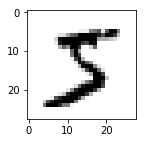

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2, 2)
    plt.imshow(image, cmap='binary')
    plt.show()
    
plot_image(X_train_image[0])

In [8]:
def plot_images_labels_predict(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25:
        num = 25
    
    for i in range(0, num):
        ax = plt.subplot(5, 5, 1 + i)
        ax.imshow(images[idx], cmap='binary')
        
        title = "l=" + str(labels[idx])
        if len(prediction) > 0:
            title = "l={}, p = {}".format(str(labels[idx]), str(prediction[idx]))
        else:
            title = "l={}".format(str(labels[idx]))
            
        ax.set_title(title, fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        
        idx += 1
        
    plt.show()

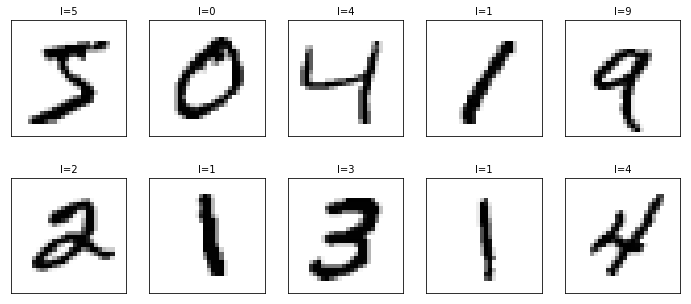

In [9]:
plot_images_labels_predict(X_train_image, y_train_label, [], 0, 10)

## data preprocessing

In [18]:
X_train = X_train_image.reshape(60000, 28 * 28).astype('float32')
X_test = X_test_image.reshape(10000, 28 * 28).astype('float32')

print('X_train shape: %s' %(str(X_train.shape)))
print('X_test shape: %s' %(str(X_test.shape)))

X_train_norm = X_train / 255.
X_test_norm = X_test / 255.

y_train_onehot = np_utils.to_categorical(y_train_label)
y_test_onehot = np_utils.to_categorical(y_test_label)


X_train shape: (60000, 784)
X_test shape: (10000, 784)


## CNN Model

In [19]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(units=256, input_dim=784, kernel_initializer='normal',
                activation='relu'))
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [22]:
history = model.fit(x=X_train_norm,
                    y=y_train_onehot,
                    validation_split=0.2,
                    epochs=10,
                    batch_size=32,
                    verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10


 - 10s - loss: 0.2648 - acc: 0.9246 - val_loss: 0.1297 - val_acc: 0.9627


Epoch 2/10


 - 9s - loss: 0.1075 - acc: 0.9682 - val_loss: 0.0944 - val_acc: 0.9719


Epoch 3/10


 - 9s - loss: 0.0704 - acc: 0.9792 - val_loss: 0.0845 - val_acc: 0.9738


Epoch 4/10


 - 9s - loss: 0.0493 - acc: 0.9850 - val_loss: 0.0915 - val_acc: 0.9721


Epoch 5/10


 - 9s - loss: 0.0363 - acc: 0.9885 - val_loss: 0.0908 - val_acc: 0.9728


Epoch 6/10


 - 9s - loss: 0.0282 - acc: 0.9913 - val_loss: 0.0837 - val_acc: 0.9763


Epoch 7/10


 - 9s - loss: 0.0200 - acc: 0.9936 - val_loss: 0.0881 - val_acc: 0.9759


Epoch 8/10


 - 9s - loss: 0.0168 - acc: 0.9952 - val_loss: 0.0872 - val_acc: 0.9775


Epoch 9/10


 - 9s - loss: 0.0134 - acc: 0.9960 - val_loss: 0.0897 - val_acc: 0.9778


Epoch 10/10


 - 9s - loss: 0.0112 - acc: 0.9969 - val_loss: 0.0976 - val_acc: 0.9762


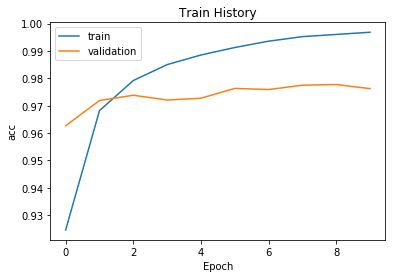

In [23]:
import matplotlib.pyplot as plt

def show_train_history(history, train, validation):
    plt.plot(history.history[train])
    plt.plot(history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    
    
show_train_history(history, 'acc', 'val_acc')
               

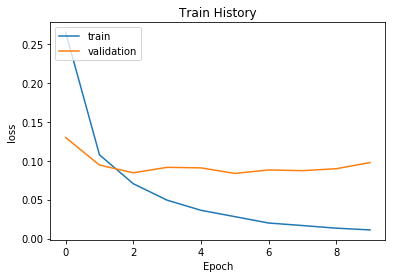

In [24]:
show_train_history(history, 'loss', 'val_loss')

In [25]:
scores = model.evaluate(X_test_norm, y_test_onehot)

print('Accuracy = {:2.1f}%'.format(scores[1] * 100.0))

   32/10000 [..............................] - ETA: 1s

  544/10000 [>.............................] - ETA: 0s

 1152/10000 [==>...........................] - ETA: 0s

 1888/10000 [====>.........................] - ETA: 0s

 2720/10000 [=======>......................] - ETA: 0s

 3456/10000 [=========>....................] - ETA: 0s

 4160/10000 [===========>..................] - ETA: 0s

 4608/10000 [============>.................] - ETA: 0s

 5152/10000 [==============>...............] - ETA: 0s

 5600/10000 [===============>..............] - ETA: 0s

 6240/10000 [=================>............] - ETA: 0s

 6912/10000 [===================>..........] - ETA: 0s

 7456/10000 [=====================>........] - ETA: 0s

 8128/10000 [=======================>......] - ETA: 0s

 8736/10000 [=========================>....] - ETA: 0s

 9216/10000 [==========================>...] - ETA: 0s

 9696/10000 [============================>.] - ETA: 0s

10000/10000 [==============================] - 1s 85us/step


Accuracy = 97.8%


Show 10 prediction results (from 240):
[5 9 8 7 2 3 0 2 4 2]
 


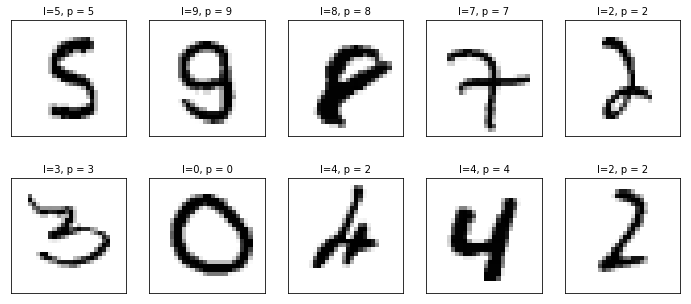

In [26]:
prediction = model.predict_classes(X_test_norm)

print("Show 10 prediction results (from 240):")
print("%s\n "% (prediction[240:250]))

plot_images_labels_predict(X_test_image, y_test_label, prediction, idx=240)